In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np 
from skmultiflow.drift_detection import DDM, EDDM
from prettytable import PrettyTable
import random
from datetime import datetime
import scipy

In [3]:
df_main = pd.read_csv("/mnt/c/Users/Asus1/jupyter-lab/New_research_prashanth_sir_code_files/resampled_dataset.csv")
df_array = df_main.to_numpy()
df_main.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Type_L', 'Type_M', 'Machine failure'],
      dtype='object')

In [4]:
df_main.head(100)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_L,Type_M,Machine failure
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,1,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,1,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,1,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,1,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,1,0,0
5,298.1,308.6,1425,41.9,11,0,0,0,0,0,0,1,0
6,298.1,308.6,1558,42.4,14,0,0,0,0,0,1,0,0
7,298.1,308.6,1527,40.2,16,0,0,0,0,0,1,0,0
8,298.3,308.7,1667,28.6,18,0,0,0,0,0,0,1,0
9,298.5,309.0,1741,28.0,21,0,0,0,0,0,0,1,0


In [5]:
def batch_dataset(dataset, batch_size):
    batch_list = []
    i = 0
    batch_number = 0
    while(i < len(dataset)):
        temp_list = []
        if i + batch_size > len(dataset):
            temp_list = dataset[i : len(dataset)]
        else:
            temp_list = dataset[i : i + batch_size]
        if len(temp_list) == batch_size:
            
            batch_list.append(temp_list)
            print(f"temp_list for batch {batch_number} : {temp_list}")
            batch_number += 1
        # else:
        #     print(f"Batch {batch_number} was disproportional to the rest of the dataset")
        i += batch_size 
        
    batch_array = np.array(batch_list)
    print(f"Number of batches : {batch_number}")
    return batch_array

In [6]:
X = df_array[:, :-1]
y = df_array[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
X_test_batches =  batch_dataset(X_test, 100)
y_test_batches =  batch_dataset(y_test, 100)

temp_list for batch 0 : [[3.02900000e+02 3.12300000e+02 1.80900000e+03 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.97400000e+02 3.08600000e+02 1.46100000e+03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.99534431e+02 3.10201031e+02 1.29900000e+03 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [3.00700000e+02 3.10700000e+02 1.34700000e+03 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.02819202e+02 3.10752091e+02 1.36400000e+03 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.99700000e+02 3.09100000e+02 1.60300000e+03 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
temp_list for batch 1 : [[2.99200000e+02 3.10100000e+02 1.53400000e+03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [3.02502373e+02 3.10968249e+02 1.29600000e+03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.02576725e+02 3.10946035e+02 1.35600000e+03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.03400000e+02 3.12900000e+02 1.38900000e+03 ...

In [7]:
def create_drift(dataset_input, batch_number, X_batch_drift_dict, drift_amount = 0.5, vary_drift_amount = 0, row_choice = 2):
    i = 0
    metadata = []
    dataset = dataset_input
    if vary_drift_amount == 1:
        drift_amount = round(random.random(), 2)
    metadata.append(drift_amount)
    
    while(i<len(dataset[0])):
        if row_choice == 0 and random.choice([0, 1]) == 1:
            dataset[:, i] = dataset[:, i] * drift_amount
            metadata.append(i)
        
        elif row_choice == 1 and i % 2 != 0:
            dataset[:, i] = dataset[:, i] * drift_amount
            metadata.append(i)

        elif row_choice == 2 and i % 2 == 0:
            dataset[:, i] = dataset[:, i] * drift_amount
            metadata.append(i)
        i = i + 1

    X_batch_drift_dict[batch_number] = metadata
    return X_batch_drift_dict, dataset

In [8]:
X_batch_drift_dict = {}
X_test_batches_drift = []

for i in range(len(X_test_batches)):
    if random.choice([0, 1, 2]) == 1 or i == 0:
        X, temp_x  = create_drift(X_test_batches[i], i, X_batch_drift_dict, drift_amount = 0.5, vary_drift_amount = 1, row_choice = 0)
        X_test_batches_drift.append(temp_x)
    else:
        temp = X_test_batches[i]  
        X_test_batches_drift.append(temp)  

In [9]:
len(X_test_batches_drift[0])

100

In [10]:
model = tf.keras.Sequential([

    Dense(units = 12,activation = "relu",input_dim = len(df_main.columns.tolist()[:-1])),
    Dense(units = 25,activation = "relu",),
    Dense(units = 50,activation = "relu",),
    Dense(units = 25,activation = "relu",),
    Dense(units = 12,activation = "relu",),
    
    Dense(units = 1, activation = "sigmoid")
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1732919372.683250     655 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732919372.831051     655 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732919372.831088     655 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732919372.852521     655 cuda_executor.cc:1001] could not open

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,381 (13.21 KB)

 Trainable params: 3,381 (13.21 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=["acc"],
)
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
with tf.device('/gpu:0'):
    model.fit(
        x= X_train,
        y= y_train,
        epochs=20,
        verbose=1,
        callbacks=[tensorboard_callback],
    )

Epoch 1/20


I0000 00:00:1732919375.431995  204632 service.cc:146] XLA service 0x7feeb000bee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732919375.432295  204632 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-11-30 03:59:35.483803: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-30 03:59:35.664177: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 34/423 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4535 - loss: 50.6737  

I0000 00:00:1732919376.961150  204632 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


423/423 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.5953 - loss: 9.6969
Epoch 2/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.7719 - loss: 0.4618
Epoch 3/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8335 - loss: 0.3788
Epoch 4/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8481 - loss: 0.3542
Epoch 5/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8463 - loss: 0.3382
Epoch 6/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8587 - loss: 0.3225
Epoch 7/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8772 - loss: 0.2895
Epoch 8/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8845 - loss: 0.2781
Epoch 9/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8963 - loss: 0.2539
Epoch 10/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8925 - loss: 0.2646
Epoch 11/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9112 - loss: 0.2278
Epoch 12/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9113 - loss: 0.2194
Epoch 13/20
423/423 ━━━━━━━━━━━━━━━━

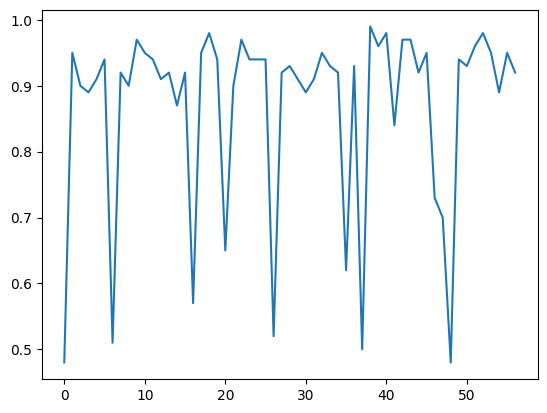

In [12]:
res_list = []
for i in range(len(X_test_batches_drift)):
    loss, accuracy = model.evaluate(X_test_batches_drift[i], y_test_batches[i], verbose = 0)
    res_list.append(accuracy)

plt.plot(res_list)

In [13]:
a = np.array(X_test_batches_drift) 
b = np.array(X_test_batches)
test = []
test_2 = []
for i in a:
    for k in i:
        test.append(k)
for j in b:
    for l in j:
        test_2.append(l)
# test = np.array(test)

In [14]:
np.array(test_2)[:, 0]
temp_test_array = []
for i in np.array(test)[:, 0]:
    temp_test_array.append((i - np.min(np.array(test)[:, 0])) / (np.max(np.array(test)[:, 0]) - np.min(np.array(test)[:, 0])))

In [15]:
type(X_test_batches[0][:, 2])
# len(X_test_batches_drift[0])

numpy.ndarray

### KS Test

- A p-value close to 0 (e.g., < 0.05) indicates that the null hypothesis can be rejected, suggesting that the two samples are likely drawn from different continuous distributions.
- A p-value close to 1 (e.g., > 0.95) indicates that the null hypothesis cannot be rejected, suggesting that the two samples may be drawn from the same continuous distribution.

The KS statistic value can range from 0 to 1, with higher values indicating a larger difference between the observed and theoretical distributions. A KS statistic value close to 0 suggests a good fit between the observed and theoretical distributions, while a value closer to 1 indicates a poor fit.

In [16]:
column_number = 0
ks_similarity_list = []
ks_p_value_list = []
i = 0
# [:, column_number]
for batch in X_test_batches_drift:
    if i == 0:
        ks_similarity_list.append(scipy.stats.kstest(X_test_batches[0], batch)[0])
        ks_p_value_list.append(scipy.stats.kstest(X_test_batches[0], batch)[1])
        prev_batch = batch
        i +=1
    else:
        ks_similarity_list.append(scipy.stats.kstest(prev_batch, batch)[0])
        ks_p_value_list.append(scipy.stats.kstest(prev_batch, batch)[1])
        prev_batch = batch

In [19]:
ks_p_value_list

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([2.11170086e-01, 5.39020789e-02, 4.41752139e-57, 3.23128798e-37,
        8.77113031e-15, 9.94235626e-01, 7.02056983e-01, 1.00000000e+00,
        9.99998822e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([0.58300906, 0.70205698, 0.21117009, 0.28194163, 0.81541471,
        1.        , 0.99968923, 1.        , 1.        , 1.        ,
        1.        , 0.99999882]),
 array([9.08410502e-01, 2.20876069e-59, 7.82211580e-02, 4.11741002e-04,
        2.81941630e-01, 1.00000000e+00, 2.11170086e-01, 5.83009061e-01,
        9.99998822e-01, 1.00000000e+00, 1.00000000e+00, 9.87818319e-03]),
 array([7.02056983e-01, 2.20876069e-59, 5.83009061e-01, 5.39020789e-02,
        2.81941630e-01, 1.00000000e+00, 4.69506449e-01, 9.99689227e-01,
        8.15414712e-01, 1.00000000e+00, 5.83009061e-01, 1.54838667e-01]),
 array([0.46950645, 0.46950645, 0.81541471, 0.96840993, 0.9084105 ,
        0.99999882, 0.9084105 , 1.        , 0.9996

## JB Test
Usually this test is applied to determine the deviation from a distribution using kurtosis and skewness of the distribution (in this case, and usually a normal distribution). This method works only on data with more than 2000 samples as it uses the p-value of a 2 tailed chi-sqaured test.

- Higher the JB test statistic, higher is the deviation from the normal distribution
- If the p-value is lower than the critical value, then one can reject the null hypothesis and claim there is a deviation in the distribution and the skewness and kurtosis is not 0.

In [17]:
jb_test_list = []
jb_p_value_list = []
# i = 0
# [:, column_number]
for batch in X_test_batches_drift:
    temp = []
    temp_p = []
    for col in range(12):
        temp.append(scipy.stats.jarque_bera(batch[:, col])[0])
        temp_p.append(scipy.stats.jarque_bera(batch[:, col])[1])
    jb_test_list.append(temp)
    jb_p_value_list.append(temp_p) 

In [94]:
column_number = 0
tt_similarity_list = []
tt_p_value_list = []
i = 0
# [:, column_number]
for batch in X_test_batches_drift:
    if i == 0:
        tt_similarity_list.append(scipy.stats.ttest_ind(X_test_batches[0], batch)[0])
        tt_p_value_list.append(scipy.stats.ttest_ind(X_test_batches[0], batch)[1])
        prev_batch = batch
        i +=1
    else:
        tt_similarity_list.append(scipy.stats.ttest_ind(prev_batch, batch)[0])
        tt_p_value_list.append(scipy.stats.ttest_ind(prev_batch, batch)[1])
        prev_batch = batch

In [ ]:
ddm = DDM(min_num_instances=100, warning_level=1.6, out_control_level=1.17)
# for k in range(12):
iterr = 0
count_w = 0
count_c = 0
for i in temp_test_array:
    
    ddm.add_element(i)
    # print(ddm.get_length_estimation())
    if ddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(temp_test_array[iterr]) + ' - of index: ' + str(iterr))
        count_w += 1
    if ddm.detected_change():
        print('Change has been detected in data: ' + str(temp_test_array[iterr]) + ' - of index: ' + str(iterr))
        count_c += 1

    iterr += 1

print(f"{count_w}, {count_c}")

In [261]:
data_stream = np.random.randint(2, size=2000)

In [270]:
ddm = DDM(100)
# Simulating a data stream as a normal distribution of 1's and 0's

# Changing the data concept from index 999 to 1500, simulating an 
# increase in error rate
for i in range(999, 1500):
    data_stream[i] = 0
# Adding stream elements to DDM and verifying if drift occurred
for i in range(2000):
    ddm.add_element(data_stream[i])
    print(ddm.get_length_estimation())
    # print(data_stream[i])
    if ddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))
        print(ddm.get_length_estimation())
    if ddm.detected_change():
        print('Change has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))
        print(ddm.get_length_estimation())

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.875
0.8888888888888888
0.7999999999999999
0.7272727272727272
0.6666666666666666
0.6923076923076923
0.6428571428571428
0.6
0.5625
0.5882352941176471
0.5555555555555556
0.5789473684210527
0.6
0.5714285714285714
0.5454545454545454
0.5652173913043478
0.5416666666666666
0.5599999999999999
0.5769230769230769
0.5555555555555555
0.5357142857142856
0.5172413793103448
0.5333333333333332
0.5483870967741934
0.5312499999999999
0.5454545454545453
0.5588235294117646
0.5714285714285713
0.5555555555555555
0.5675675675675674
0.5789473684210525
0.564102564102564
0.5499999999999999
0.5609756097560975
0.5476190476190476
0.5581395348837209
0.5681818181818181
0.5777777777777777
0.5652173913043478
0.553191489361702
0.5624999999999999
0.5510204081632653
0.5399999999999999
0.5490196078431372
0.5384615384615384
0.5283018867924528
0.5185185185185185
0.5272727272727272
0.5357142857142857
0.543859649122807
0.5344827586206897
0.5423728813559323
0.5500000000000002
0.557377049180328
0.548

0.4805653710247347